In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import country_converter as coco
import warnings
warnings.simplefilter('ignore')

In [3]:
df = pd.read_csv('categorized_data.csv')
df = df.drop(columns= ['Unnamed: 0','country_encoded','Item_encoded'],axis=1)
df

,Country,Item,Year,production_in_t,area_in_h,yield_in_kg_per_h,Category
0,Afghanistan,"Almonds, in shell",2019,38205.0,29203.0,1308.0,Nuts
1,Afghanistan,"Almonds, in shell",2020,39307.0,22134.0,1776.0,Nuts
2,Afghanistan,"Almonds, in shell",2021,64256.0,36862.0,1743.0,Nuts
3,Afghanistan,"Almonds, in shell",2022,63515.0,36462.0,1742.0,Nuts
4,Afghanistan,"Almonds, in shell",2023,67000.0,37000.0,1811.0,Nuts
...,...,...,...,...,...,...,...
46335,Zimbabwe,Wheat,2019,94685.0,24186.0,3915.0,Cereals
46336,Zimbabwe,Wheat,2020,212530.0,44466.0,4780.0,Cereals
46337,Zimbabwe,Wheat,2021,337212.0,66434.0,5076.0,Cereals
46338,Zimbabwe,Wheat,2022,250000.0,48504.0,5154.0,Cereals


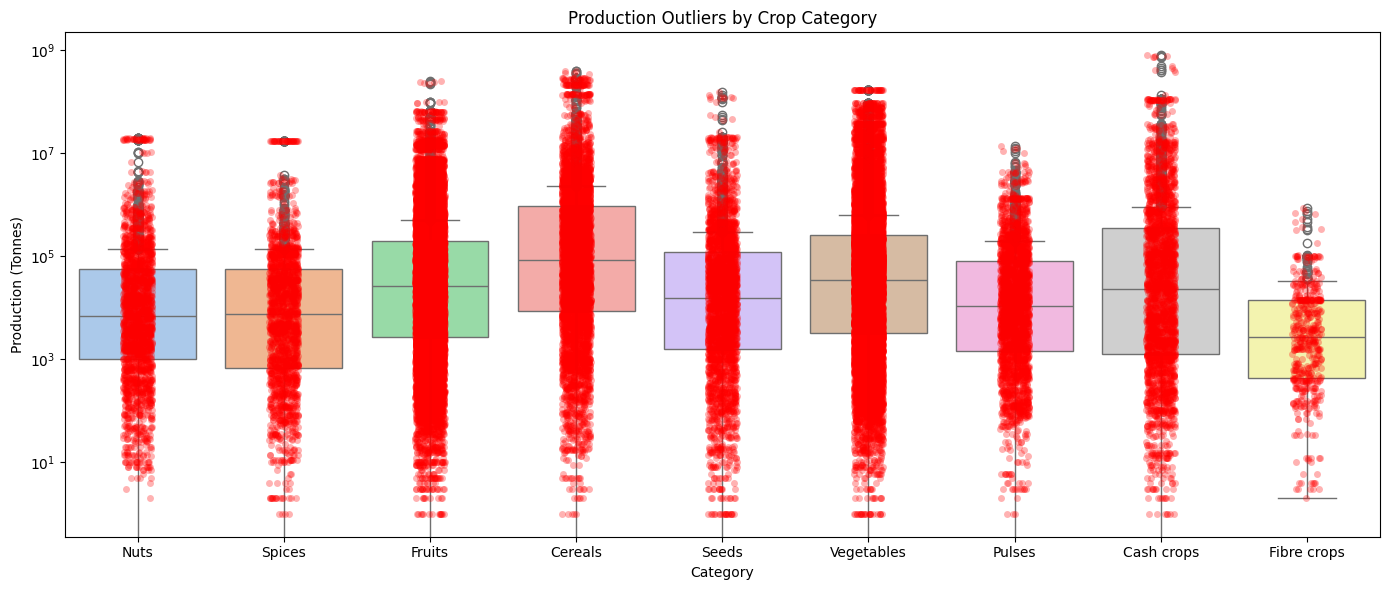

In [4]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Category', y='production_in_t', showfliers=True, palette='pastel')
sns.stripplot(data=df, x='Category', y='production_in_t', color='red', alpha=0.3)

plt.yscale('log')
plt.title("Production Outliers by Crop Category")
plt.ylabel("Production (Tonnes)")
plt.xticks()
plt.tight_layout()
plt.show()

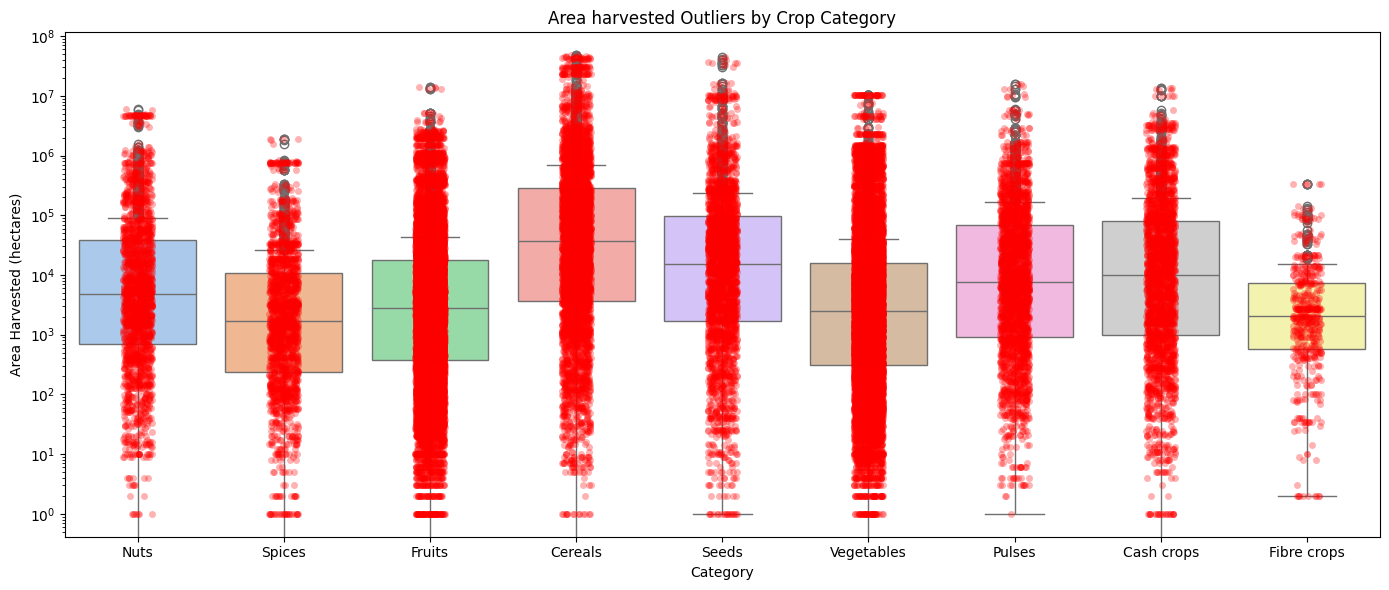

In [5]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Category', y='area_in_h', showfliers=True, palette='pastel')
sns.stripplot(data=df, x='Category', y='area_in_h', color='red', alpha=0.3)

plt.yscale('log') 
plt.title("Area harvested Outliers by Crop Category")
plt.ylabel("Area Harvested (hectares)")
plt.xticks()
plt.tight_layout()
plt.show()

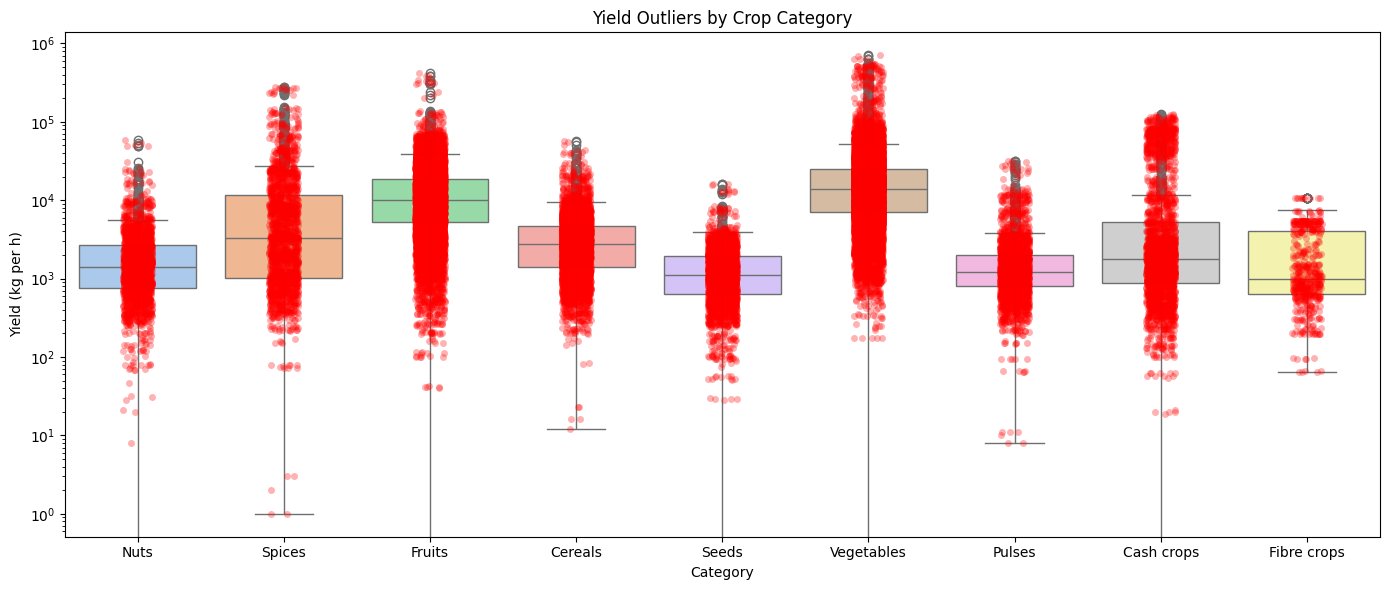

In [6]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='Category', y='yield_in_kg_per_h', showfliers=True, palette='pastel')
sns.stripplot(data=df, x='Category', y='yield_in_kg_per_h', color='red', alpha=0.3)

plt.yscale('log')
plt.title("Yield Outliers by Crop Category")
plt.ylabel("Yield (kg per h)")
plt.xticks()
plt.tight_layout()
plt.show()

In [7]:
# Identifying outliers in data

def remove_outliers_iqr(df, columns):
    cleaned_df = df.copy()
    for col in columns:
        Q1 = cleaned_df[col].quantile(0.25)
        Q3 = cleaned_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        cleaned_df = cleaned_df[(cleaned_df[col] >= lower_bound) & (cleaned_df[col] <= upper_bound)]
    return cleaned_df

# Columns to clean
columns_to_clean = ['production_in_t', 'area_in_h', 'yield_in_kg_per_h']

# Applying the function
df_cleaned = remove_outliers_iqr(df, columns_to_clean)

print(f"Original Rows: {len(df)}")
print(f"Cleaned Rows: {len(df_cleaned)}")
print(f"Outliers Removed: {len(df) - len(df_cleaned)}")


Original Rows: 46340
Cleaned Rows: 31006
Outliers Removed: 15334


In [8]:
import country_converter as coco

cc = coco.CountryConverter()
df_cleaned['continent'] = df_cleaned['Country'].apply(lambda x: cc.convert(names=x, to='continent', not_found=None))

continent_list = list(df_cleaned['continent'].unique())
continent_list

['Asia', 'Europe', 'Africa', 'America', 'Oceania']

In [11]:
df_cleaned = df_cleaned.rename(columns = {
        'area_in_h':'area',
        'production_in_t':'production',
        'yield_in_kg_per_h':'yield',
        'Country':'country',
        'Item':'item',
        'Category':'category',
        'Year':'year'
    }
)

In [14]:
df_cleaned.to_csv('cleaned_df.csv')